# Plotting sigmoid 2D

In [2]:
import numpy as np
import matplotlib.pyplot as plt

$S_{w,b}(x) = \frac{1}{1 + e^{-(wx+b)}}$

In [3]:
def sigmoid(w,b,x):
    return 1/(1 + np.exp(-(w*x + b)))

In [4]:
sigmoid(0.5,0,1)

0.6224593312018546

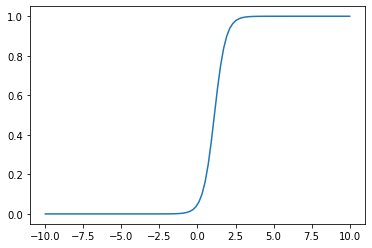

In [5]:
w = 2.7 #@param {type: "slider", min: -5, max: 5, step:0.1}
b = -3 #@param {type: "slider", min: -3, max: 3,step: 0.1}
X = np.linspace(-10,10,100) 
Y = sigmoid(w,b,X) 
plt.plot(X,Y)
plt.show()

# Plotting Sigmoid 3D

In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [7]:
def sigmoid_3d(w1,w2,x1,x2,b):
    return 1/(1 + np.exp(-(w1*x1 + w2*x2 + b)))

In [8]:
sigmoid_3d(0.5,0,1,0,0)

0.6224593312018546

In [9]:
from mpl_toolkits import mplot3d

In [10]:
x1 = np.linspace(-10,10,100)
x2 = np.linspace(-10,10,100)

In [11]:
p,q = np.meshgrid(x1,x2)

In [12]:
print(x1.shape,x2.shape,p.shape,q.shape)

(100,) (100,) (100, 100) (100, 100)


In [13]:
w1 = 0.5
w2 = 5
b = 0
Y = sigmoid_3d(w1,w2,p,q,b)

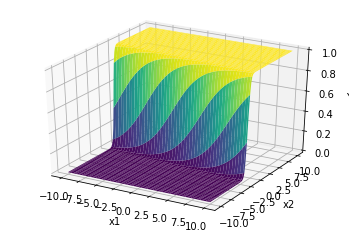

In [14]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(p,q,Y, cmap= 'viridis')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('Y');

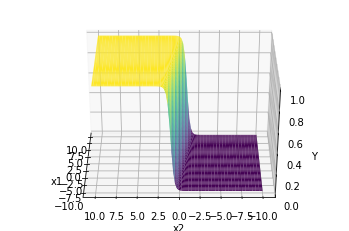

In [15]:
ax.view_init(30,180)
fig

# Compute Loss 

In [16]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
def sigmoid(w,b,x):
    return 1/(1 + np.exp(-(w*x + b)))

In [18]:
np.random.seed(5)
X = np.random.random(25) * 20 - 10

In [19]:
np.mean(X)

-0.9516725322026147

In [20]:
w_unk = 0.5
b_unk = 0.5

In [21]:
Y = sigmoid(w_unk,b_unk,X)

In [22]:
Y.shape

(25,)

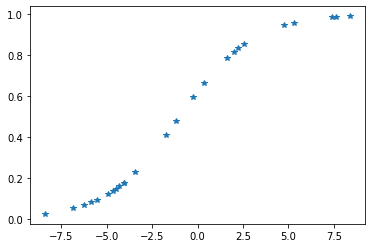

In [23]:
plt.plot(X,Y,'*')
plt.show()

In [24]:
def cal_loss(X,Y,w_curr,b_curr):
    loss = 0
    for x,y in zip(X,Y):
        loss += (y - sigmoid(w_curr,b_curr,x))**2
    return loss

In [88]:
w = np.linspace(0,2,101)
b = np.linspace(-1,1,102)


In [89]:
w_mesh,b_mesh = np.meshgrid(w,b)
Loss = np.zeros(w_mesh.shape)

In [90]:
w_mesh.shape

(102, 101)

In [91]:
for i in range(w_mesh.shape[0]):
    for j in range(w_mesh.shape[1]):
        Loss[i,j] = cal_loss(X,Y,w_mesh[i,j],b_mesh[i,j])

In [92]:
Loss.shape

(102, 101)

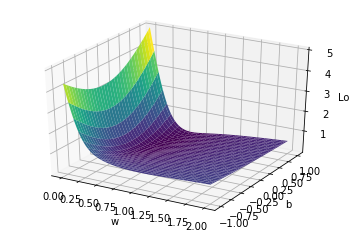

In [93]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(w_mesh,b_mesh,Loss,cmap= 'viridis')
ax.set_xlabel('w');
ax.set_ylabel('b');
ax.set_zlabel('Loss');

In [94]:
num = np.argmin(Loss)
print(num)
row = int(np.floor(num/Loss.shape[1]))
col = int(num - row * Loss.shape[1])

7701


In [95]:
row,col

(76, 25)

In [96]:
print(w_mesh[row,col],b_mesh[row,col])

0.5 0.504950495049505


# Contour plot

In [101]:
x1 = np.linspace(-10,10,100)
x2 = np.linspace(-10,10,100)

In [102]:
p,q = np.meshgrid(x1,x2)

In [133]:
w1 = 0.5
w2 = 5
b = 0
Y = sigmoid_3d(w1,w2,p,q,b) 

In [134]:
import matplotlib.colors
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("",["red","yellow","green"])

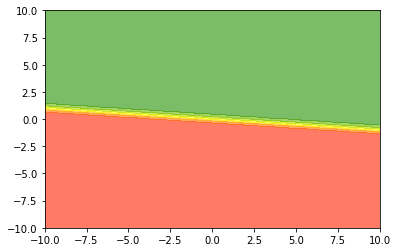

In [135]:
plt.contourf(p,q,Y,cmap = my_cmap,alpha = 0.6)
plt.show()

# Class for Sigmoid

In [161]:
class SigmoidNeuron():

    def __init__(self):
        self.w = None
        self.b = None

    def perceptron(self,x):
        return np.dot(self.w,x) + self.b
    
    def sigmoid(self,x):
        return 1.0/(1.0 + np.exp(-x))
    
    def grad_w(self,x,y):
        y_pred = self.sigmoid(self.perceptron(x))
        return (y_pred - y) * y_pred * (1 - y_pred) * x

    def grad_b(self,x,y):
        y_pred = self.sigmoid(self.perceptron(x))
        return (y_pred - y) * y_pred * (1 - y_pred)
    
    def fit(self,X,Y,epochs = 10,lr = 0.01,initialise = True):

        if initialise:
            self.w = np.random.randn(1,X.shape[1])
            self.b = 0
        for i in range(epochs):
            dw,db = 0,0
            for x,y in zip(X,Y):
                dw += self.grad_w(x,y)
                db += self.grad_b(x,y)
            self.w -= lr * dw
            self.b -= lr * db
    
    def plot_sn(self,X,Y):
        X1 = np.linspace(-10,10,100)
        X2 = np.linspace(-10,10,100)
        XX1,XX2 = np.meshgrid(X1,X2)
        YY = np.zeros(XX1.shape)
        for i in range(X2.size):
            for j in range(X1.size):
                val = np.array([X1[j],X2[i]])
                YY[i,j] = self.sigmoid(self.perceptron(val))
        plt.contourf(XX1,XX2,YY,cmap = my_cmap,alpha = 0.6)
        plt.scatter(X[:,0],X[:,1],c = Y,cmap = my_cmap)
        plt.show()

In [162]:
X = np.array([[2.5,2.5],[4,-1],[1,-4],[3,1.25],[2,4],[1,5]])
Y = np.array([1,1,1,0,0,0])

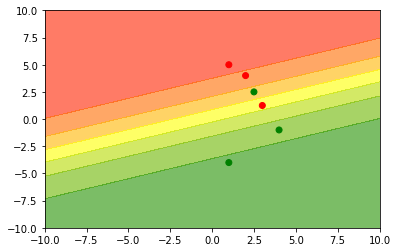

In [163]:
sn = SigmoidNeuron()
sn.fit(X,Y,epochs = 20,lr = 0.5)
sn.plot_sn(X,Y)

In [147]:
print(sn.w,sn.b)

[[ 1.77781501 -1.23643827]] [-0.28149651]
